# Test ios Model vs. py

In [ ]:
from notebooks import *
sg.init(None)
figsize(aspect=1/12)
cache_control(enabled=False)

INFO     [14:06:27.094] [22248] 151 logging_/<module>: {logging_yaml: None}

INFO     [14:06:27.603] [22248]  32 api.server_globals/init

DEBUG    [14:06:27.610] [22248]  75 api.server_globals/load: load_search...

INFO     [14:06:27.912] [22248]  79 api.server_globals/load: load_search (took 0.294s)

DEBUG    [14:06:27.918] [22248]  75 api.server_globals/load: load_xc_meta...

INFO     [14:06:28.249] [22248]  79 api.server_globals/load: load_xc_meta (took 0.322s)

DEBUG    [14:06:28.256] [22248]  75 api.server_globals/load: load_feat_info...

INFO     [14:06:28.263] [22248] 110 api.server_globals/load_feat_info

INFO     [14:06:28.270] [22248]  79 api.server_globals/load: load_feat_info (took 0.007s)

DEBUG    [14:06:28.276] [22248]  75 api.server_globals/load: load_search_recs...

INFO     [14:06:28.282] [22248] 118 api.server_globals/load_search_recs

INFO     [14:06:28.289] [22248] 601 api.recs/get_search_recs

INFO     [14:06:28.303] [22248] 152 payloads/df_cache_hybrid: Hit: payloads/search_recs-version[8],limit[100],audio_s[10],countries_k[na],com_names_k[ca],num_recs[None]-fb42447

DEBUG    [14:06:28.313] [22248] 153 payloads/df_cache_hybrid: Hit ...

DEBUG    [14:06:28.324] [22248] 162 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (164.0 kB) ...

INFO     [14:06:28.856] [22248] 169 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (164.0 kB) [0.531s]

DEBUG    [14:06:28.875] [22248] 174 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (4.0 MB) ...

INFO     [14:06:28.889] [22248] 181 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (4.0 MB) [0.014s]

DEBUG    [14:06:28.901] [22248] 174 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (1.1 MB) ...

INFO     [14:06:28.911] [22248] 181 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (1.1 MB) [0.010s]

DEBUG    [14:06:28.923] [22248] 186 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (132.5 kB) ...

INFO     [14:06:28.930] [22248] 188 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (132.5 kB) [float32, 0.007s]

DEBUG    [14:06:28.940] [22248] 186 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (600.1 kB) ...

INFO     [14:06:28.947] [22248] 188 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (600.1 kB) [float32, 0.007s]

INFO     [14:06:28.954] [22248] 191 payloads/df_cache_hybrid: Hit: Join lite + bytes + feats

INFO     [14:06:28.979] [22248] 202 payloads/df_cache_hybrid: Hit [0.667s]

,dir,file,size,frac
5,api,TOTAL,6007805,1.000
1,api,api/bytes-audio_bytes.parquet,4030138,0.671
2,api,api/bytes-spectro_bytes.parquet,1081058,0.180
4,api,api/feat-feat.npy: float32,600128,0.100
0,api,api/lite.parquet,163953,0.027
3,api,api/feat-f_preds.npy: float32,132528,0.022


INFO     [14:06:29.013] [22248]  79 api.server_globals/load: load_search_recs (took 0.731s)

INFO     [14:06:29.020] [22248]  34 api.server_globals/init: done

In [ ]:
def sigp(x):
    pp((x.shape, x[:7]))
def sig(x):
    sigp(x)
    plt.plot(x); plt.show()
def mat(X, rows=10, cols=9, **show_img_kwargs):
    pp(X.shape)
    pp(X[:rows, :cols])
    show_img(X, **show_img_kwargs)
def mat_flip(*args, **kwargs):
    mat(*args, **{
        'origin': 'lower',
        **kwargs,
    })

In [ ]:
# Params (global)
sample_rate = sg.search.projection.features.sample_rate
f_bins      = sg.search.projection.features.f_bins

# FIXME(wav_mp4_unstable_preds) wav vs. mp4 causes unstable f_preds
#   - Defer: doesn't look like a showstopper, revisit later to improve app quality

In [ ]:
def f_preds_from_paths(paths, start_s=0, end_s=10):
    recs = sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / path) for path in paths])).assign(
        id=lambda df: df.id,
        audio=lambda df: df_map_rows(df, lambda rec: (
            sg.search.projection.features.slice_audio(rec, start_s, end_s)
            .audio.unbox.to_numpy_array()
        )),
    )
    spectros = [
        sg.search.projection.features._spectro_nocache_from_audio(audio)  # audio -> spectro
        for audio in recs.audio
    ]
    feats = sg.search.projection.feat(DF(dict(spectro=spectros)))         # spectro -> patches -> proj -> agg -> feat
    f_predss = sg.search.species_proba(DF(dict(feat=feats)))              # feat -> f_preds
    f_predss = np.array(f_predss)
    for rec, spectro in zip(df_rows(recs), spectros):
        print('audio[%s], id[%s]' % (len(rec.audio), rec.id))
        spectro.plot(raw=dict(scale=.844))
    mat(f_predss, scale=3)
    return f_predss

audio_metadata: [

] |   0% (2) |  0.0s

audio_metadata: [

] |   0% (2) |  0.2s

audio_metadata: [

##################################################################################

] | 100% (2) |  1.1s

audio: [

] |   0% (2) |  0.0s

audio: [

###########################################################################################

] | 100% (2) |  0.1s

feat: [

] |   0% (2) |  0.0s

feat: [

############################################################################################

] | 100% (2) |  0.1s

audio[17640], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)]

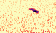

audio[17640], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)]

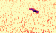

(

2

,

331

)

array([[0.014, 0.002, 0.   , 0.   , 0.007, 0.001, 0.002, 0.001, 0.005],
       [0.01 , 0.002, 0.   , 0.   , 0.003, 0.   , 0.001, 0.002, 0.004]], dtype=float32)

audio_metadata: [

] |   0% (2) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (2) |  0.1s

audio: [

] |   0% (2) |  0.0s

audio: [

###########################################################################################

] | 100% (2) |  0.1s

feat: [

] |   0% (2) |  0.0s

feat: [

############################################################################################

] | 100% (2) |  0.1s

audio[39690], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)]

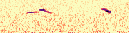

audio[39690], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)]

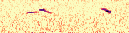

(

2

,

331

)

array([[5.797e-03, 3.742e-03, 8.006e-05, 2.172e-04, 4.190e-03, 8.428e-05, 1.379e-03, 2.025e-03, 1.907e-03],
       [5.831e-03, 2.628e-03, 4.732e-05, 1.453e-04, 3.080e-03, 3.394e-05, 1.076e-03, 1.921e-03, 1.714e-03]],
      dtype=float32)

In [ ]:
# Exclude blip at end: wav/mp4 produce similar f_preds, but probably more differences than we'd like
f_preds_from_paths(start_s=1, end_s=1.8, paths=[
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)',
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)',
]);
f_preds_from_paths(start_s=0, end_s=1.8, paths=[
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)',
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)',
]);

audio_metadata: [

] |   0% (2) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (2) |  0.1s

audio: [

] |   0% (2) |  0.0s

audio: [

###########################################################################################

] | 100% (2) |  0.1s

feat: [

] |   0% (2) |  0.0s

feat: [

############################################################################################

] | 100% (2) |  0.1s

audio[44452], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)]

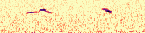

audio[45048], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)]

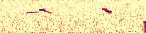

(

2

,

331

)

array([[5.907e-03, 3.079e-03, 8.716e-05, 2.111e-04, 4.521e-03, 7.982e-05, 1.471e-03, 1.868e-03, 2.083e-03],
       [2.729e-03, 3.897e-03, 1.913e-05, 2.091e-04, 1.902e-03, 1.040e-04, 1.594e-03, 3.743e-03, 7.427e-04]],
      dtype=float32)

In [ ]:
# Allow blip at end: f_preds diverge more
f_preds_from_paths(start_s=0, end_s=10, paths=[
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)',
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)',
]);

In [ ]:
# Isolate blip at end: f_preds diverge way more
f_preds_from_paths(start_s=1.7, end_s=10, paths=[
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)',
    'cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)',
]);

audio_metadata: [

] |   0% (2) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (2) |  0.1s

audio: [

] |   0% (2) |  0.0s

audio: [

###########################################################################################

] | 100% (2) |  0.1s

feat: [

] |   0% (2) |  0.0s

feat: [

############################################################################################

] | 100% (2) |  0.1s

audio[6967], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav)]

audio[7563], id[cache/audio/xc/data/SWTH/417277/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k).enc(wav)]

(

2

,

331

)

array([[5.735e-03, 4.110e-03, 5.135e-04, 2.690e-03, 1.961e-03, 3.748e-03, 4.644e-03, 2.595e-03, 7.907e-03],
       [1.769e-03, 7.527e-03, 1.684e-05, 4.098e-03, 4.414e-05, 1.658e-03, 5.638e-03, 2.833e-03, 4.416e-03]],
      dtype=float32)

# Search.f_preds

In [ ]:
with test_for_swift('Search.f_preds: search_recs.sample(10) start=0 end=10: Compute audio->f_preds') as (name, Dump):
    (start_s, end_s) = (0, 10)
    # One-by-one: load -> slice -> audio -> spectro (b/c _spectro_nocache_from_audio)
    audios = []
    spectros = []
    for search_rec in df_rows(sg.search_recs.sample(10)):
        rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
        rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
        audio = rec.audio.unbox.to_numpy_array()
        spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
        audios.append(audio)
        spectros.append(spectro)
    # Bulk: spectro -> patches -> proj -> agg -> feat
    feats = sg.search.projection.feat(DF(dict(spectro=spectros)))
    # Bulk: feat -> f_preds
    f_predss = sg.search.species_proba(DF(dict(feat=feats)))
    f_predss = np.array(f_predss)
    # [sig(x) for x in audios]  # Can't mat() because audios aren't uniform lengths
    mat_flip(f_predss, scale=3)
    raise Dump(sample_rate=sample_rate, audios=[x.tolist() for x in audios], f_predss=f_predss.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

feat: [

] |   0% (10) |  0.0s

feat: [

##################                                                                         

] |  20% (10) |  0.1s

feat: [

###########################################################################################

] | 100% (10) |  0.2s

(

10

,

331

)

array([[1.575e-03, 3.920e-03, 4.091e-05, 5.452e-04, 1.457e-03, 2.435e-03, 4.365e-03, 9.335e-04, 8.939e-04],
       [8.909e-04, 2.593e-03, 4.478e-05, 1.320e-04, 2.581e-05, 1.284e-04, 1.108e-04, 3.028e-05, 8.446e-06],
       [1.320e-04, 6.719e-05, 2.478e-05, 2.222e-03, 5.856e-07, 2.034e-05, 1.937e-04, 7.651e-05, 3.520e-08],
       [5.924e-03, 1.517e-03, 3.904e-04, 1.619e-04, 2.867e-03, 2.091e-03, 1.925e-04, 1.333e-03, 1.325e-03],
       [2.666e-03, 6.588e-03, 1.587e-07, 1.787e-04, 1.654e-03, 7.313e-03, 9.761e-05, 1.278e-02, 2.900e-03],
       [3.679e-03, 2.566e-03, 7.893e-05, 3.707e-05, 3.506e-04, 1.426e-03, 3.608e-04, 2.816e-04, 3.719e-04],
       [4.047e-05, 2.197e-04, 7.352e-04, 4.178e-05, 2.467e-04, 5.476e-04, 4.975e-05, 5.029e-04, 4.845e-04],
       [1.065e-03, 3.997e-02, 1.054e-08, 1.424e-06, 1.993e-05, 1.099e-03, 7.606e-04, 1.678e-03, 5.791e-10],
       [2.220e-02, 1.672e-06, 2.694e-10, 2.284e-08, 5.198e-07, 7.992e-05, 9.648e-06, 2.347e-07, 8.495e-11],
       [7.240e-04, 6.349e-04

In [ ]:
with test_for_swift('Search.f_preds: search_recs.sample(10) start=0 end=10: Read search_recs.f_preds') as (name, Dump):
    (start_s, end_s) = (0, 10)
    # One-by-one: load -> slice -> audio (b/c we don't store audio samples in search_recs)
    audios = []
    f_predss = []
    for search_rec in df_rows(sg.search_recs.sample(10)):
        rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
        rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
        audio = rec.audio.unbox.to_numpy_array()
        audios.append(audio)
        # Read stored search_recs.f_preds i/o computing via e2e pipeline
        f_predss.append(search_rec.f_preds)
    f_predss = np.array(f_predss)
    # [sig(x) for x in audios]  # Can't mat() because audios aren't uniform lengths
    mat_flip(f_predss, scale=3)
    raise Dump(sample_rate=sample_rate, audios=[x.tolist() for x in audios], f_predss=f_predss.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

10

,

331

)

array([[4.567e-06, 1.637e-06, 1.610e-07, 8.163e-10, 2.583e-06, 8.342e-04, 4.348e-08, 5.934e-05, 8.611e-07],
       [6.728e-05, 5.569e-03, 1.547e-05, 1.235e-04, 1.851e-04, 1.484e-06, 3.966e-03, 1.221e-02, 1.183e-04],
       [8.691e-03, 6.541e-06, 5.629e-07, 5.451e-02, 1.698e-07, 3.390e-06, 6.956e-04, 1.849e-05, 3.073e-07],
       [3.674e-03, 1.241e-03, 2.386e-04, 6.762e-05, 8.206e-04, 2.081e-03, 8.695e-04, 2.397e-04, 6.535e-04],
       [3.418e-03, 2.154e-03, 1.451e-04, 2.882e-04, 2.948e-03, 1.633e-03, 5.780e-04, 2.213e-03, 3.197e-03],
       [5.939e-04, 1.182e-04, 7.612e-05, 3.370e-07, 8.719e-06, 6.441e-04, 6.778e-07, 2.216e-06, 2.420e-05],
       [3.254e-03, 4.357e-04, 2.685e-05, 4.298e-05, 9.233e-04, 3.252e-04, 4.653e-04, 5.646e-04, 5.665e-04],
       [8.857e-04, 2.591e-03, 4.423e-05, 1.311e-04, 2.545e-05, 1.278e-04, 1.098e-04, 3.003e-05, 8.426e-06],
       [1.204e-04, 1.444e-03, 5.622e-06, 3.545e-03, 1.132e-04, 7.971e-05, 6.473e-05, 2.267e-04, 3.880e-07],
       [3.679e-03, 2.566e-03

# Search.species_proba

In [ ]:
with test_for_swift('Search.species_proba: search_recs.sample(10) start=0 end=10') as (name, Dump):
    (start_s, end_s) = (0, 10)
    # One-by-one: load -> slice -> audio -> spectro (b/c _spectro_nocache_from_audio)
    spectros = []
    for search_rec in df_rows(sg.search_recs.sample(10)):
        rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
        rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
        audio = rec.audio.unbox.to_numpy_array()
        spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
        spectros.append(spectro)
    spectros = spectros
    # Bulk: spectro -> patches -> proj -> agg -> feat
    feats = sg.search.projection.feat(DF(dict(spectro=spectros)))
    # Bulk: feat -> f_preds
    f_predss = sg.search.species_proba(DF(dict(feat=feats)))
    feats = np.array(feats)
    f_predss = np.array(f_predss)
    mat_flip(feats, scale=3)
    mat_flip(f_predss, scale=3)
    raise Dump(feats=feats.tolist(), f_predss=f_predss.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

feat: [

] |   0% (10) |  0.0s

feat: [

##################                                                                         

] |  20% (10) |  0.1s

feat: [

###########################################################################################

] | 100% (10) |  0.2s

(

10

,

1500

)

array([[ 2.726e-02,  1.103e-01, -6.306e-02,  3.435e-05,  6.974e-02,  3.254e-01,  6.078e-02, -1.605e-02,  5.824e-02],
       [ 7.970e-02, -4.687e-02,  2.530e-03, -4.247e-02, -4.378e-02, -5.451e-02,  2.480e-02, -4.693e-02,  3.642e-02],
       [ 8.411e-03, -7.583e-02, -2.032e-02, -9.131e-02, -8.620e-02, -9.233e-02,  8.511e-02, -6.825e-02,  2.308e-01],
       [ 2.196e-02,  9.909e-03,  1.770e-01, -6.814e-02, -1.879e-02, -4.759e-02,  6.099e-02, -2.182e-01,  7.565e-02],
       [ 2.145e-02,  2.198e-03,  6.316e-02, -4.770e-03,  1.603e-01, -1.695e-02, -2.150e-02, -5.129e-02,  7.033e-02],
       [ 3.440e-02,  3.225e-02, -6.770e-02, -3.978e-03, -1.221e-01,  1.395e-02,  2.879e-02, -5.901e-02,  4.226e-02],
       [ 2.120e-02, -8.000e-03, -3.738e-01, -1.530e-01,  9.811e-02, -1.515e-01,  4.533e-02,  1.291e-02,  6.131e-01],
       [ 5.600e-02, -1.707e-01, -1.771e-01,  7.318e-02, -4.355e-02, -2.835e-01,  1.135e-03, -8.584e-02,  7.228e-02],
       [ 4.880e-02, -5.443e-02,  1.012e-01, -6.135e-02, -2.919e-

(

10

,

331

)

array([[8.269e-03, 4.380e-03, 1.825e-05, 1.982e-08, 5.313e-04, 1.663e-06, 4.979e-08, 1.764e-06, 5.578e-06],
       [1.483e-02, 4.784e-03, 3.753e-04, 1.945e-03, 7.717e-04, 5.843e-04, 1.075e-02, 3.086e-03, 5.745e-04],
       [2.729e-03, 3.897e-03, 1.913e-05, 2.091e-04, 1.902e-03, 1.040e-04, 1.594e-03, 3.743e-03, 7.427e-04],
       [5.656e-03, 3.392e-06, 1.926e-06, 3.602e-02, 3.457e-07, 8.271e-06, 1.067e-04, 6.357e-05, 1.267e-06],
       [1.320e-04, 6.719e-05, 2.478e-05, 2.222e-03, 5.856e-07, 2.034e-05, 1.937e-04, 7.651e-05, 3.520e-08],
       [1.919e-05, 8.173e-04, 9.130e-05, 1.390e-03, 1.037e-04, 1.272e-03, 1.405e-02, 9.550e-04, 5.321e-05],
       [1.944e-03, 1.478e-04, 4.952e-08, 4.640e-06, 6.147e-05, 6.278e-05, 3.751e-05, 1.285e-03, 2.609e-02],
       [3.191e-04, 1.641e-05, 6.727e-06, 1.205e-02, 4.650e-05, 1.531e-05, 1.459e-03, 1.456e-05, 2.252e-08],
       [2.016e-03, 5.539e-03, 6.216e-07, 3.220e-04, 2.088e-04, 4.810e-04, 9.752e-04, 2.510e-03, 9.033e-05],
       [7.135e-03, 9.721e-04

# Projection._feat/_agg

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

500

,

857

)

array([[ 0.073,  0.068,  0.231,  0.035,  0.109, -0.32 , -0.404,  0.101, -0.007],
       [-0.088,  0.102, -0.669,  0.373, -0.156, -0.041,  0.227, -0.068, -1.035],
       [-0.201, -0.382, -0.899, -1.22 , -0.601, -0.722, -0.2  ,  0.097, -0.459],
       [-0.024, -0.036, -0.278,  0.536, -0.166, -0.028, -0.185,  0.175,  0.792],
       [-0.08 , -0.126, -0.12 ,  0.217, -0.367, -0.15 , -0.149, -0.813,  0.009],
       [-0.058, -0.239, -0.14 , -0.45 ,  0.277,  0.353, -0.484, -0.417, -0.304],
       [ 0.061,  0.074,  0.226,  0.901,  0.261, -0.081, -0.069,  0.331,  0.691],
       [-0.087, -0.104, -0.331, -0.502, -0.118, -0.013, -0.278, -0.156, -0.048],
       [-0.059,  0.066,  0.605,  0.481, -0.399,  1.487, -0.573, -0.448, -0.311],
       [-0.086, -0.043, -0.067, -0.109, -0.226, -0.064,  0.056,  0.407,  0.821]])

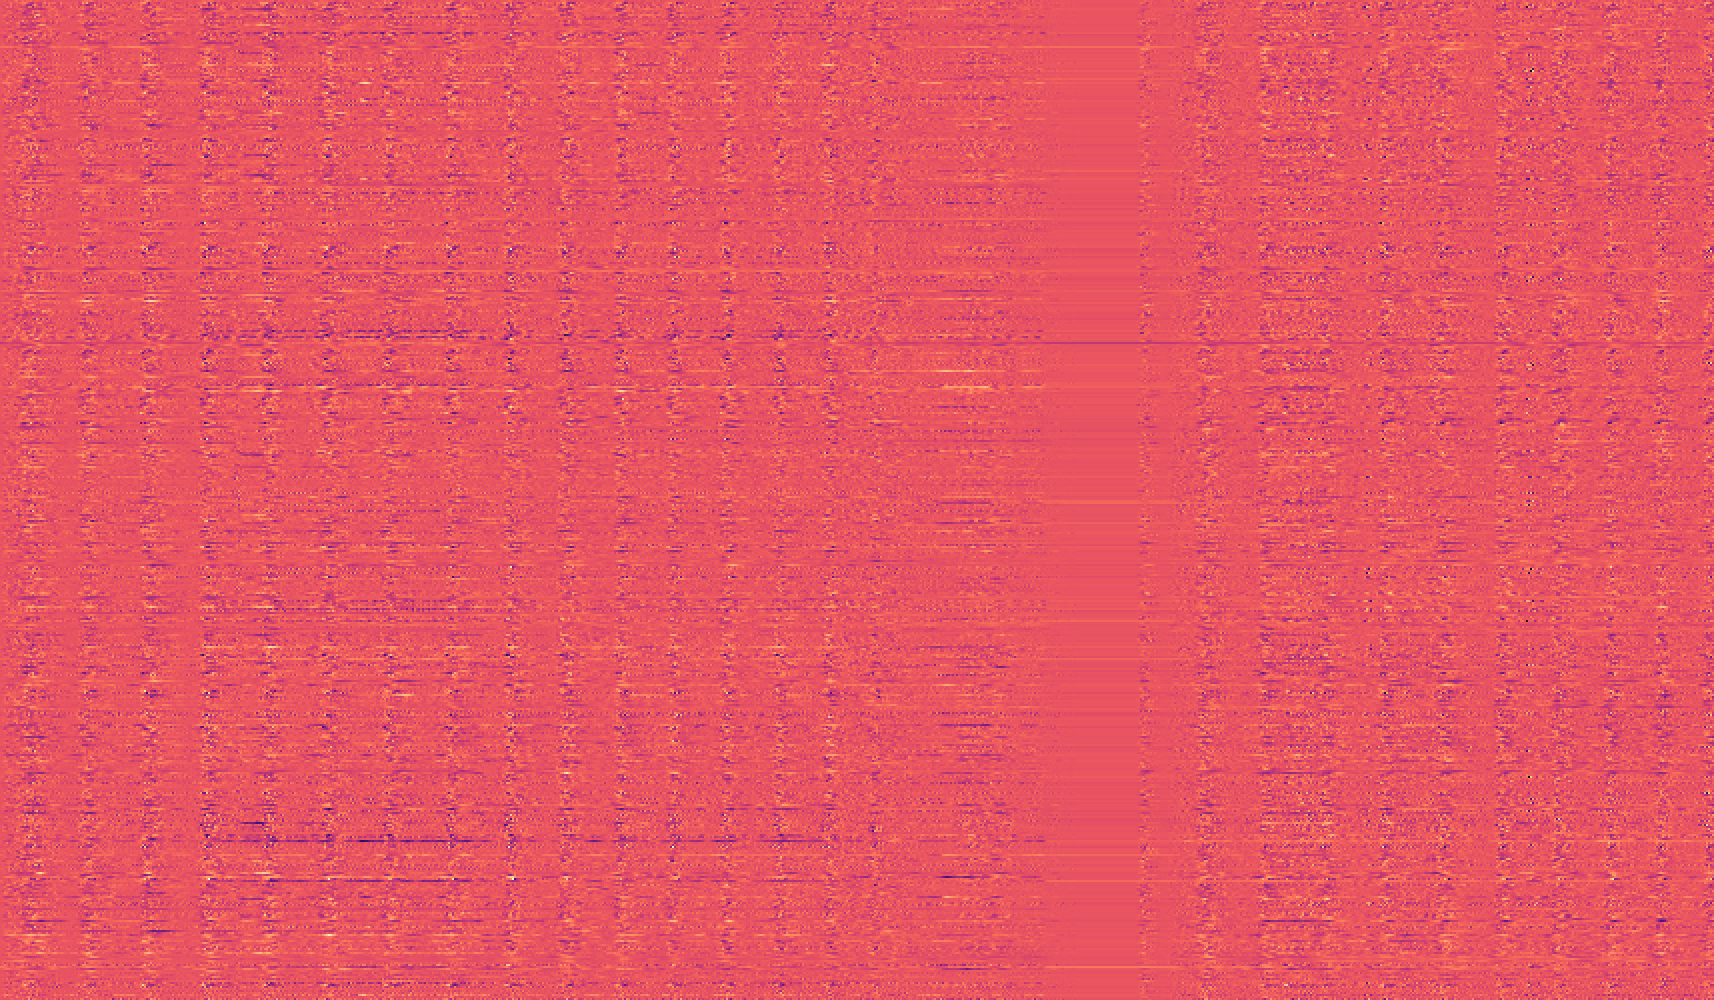

(

(

1500

,

)

,

array([ 0.06 , -0.089, -0.178, -0.066, -0.057, -0.105,  0.076])

)

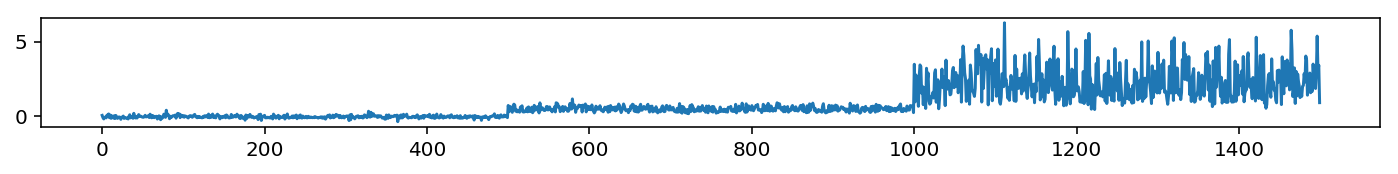

In [ ]:
with test_for_swift('Projection._feat/_agg: XC416346 start=0 end=10') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    proj = sg.search.projection._proj(AttrDict(patches=patches))
    agg = sg.search.projection._agg(AttrDict(proj=proj))
    feat = sg.search.projection._feat(AttrDict(agg=agg))
    mat_flip(proj, scale=2)
    sig(feat)
    raise Dump(proj=proj.tolist(), feat=feat.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

500

,

13

)

array([[-2.913e-03, -6.029e-01, -6.561e-01,  1.336e+00,  1.484e+00, -1.367e+00,  3.697e-01, -1.197e+00,  6.884e-02],
       [-3.358e-01, -5.247e-02,  4.692e-01,  9.962e-02, -2.613e-01, -5.195e-01,  5.274e-01, -3.309e-01, -1.686e-01],
       [-4.373e-01, -5.945e-01, -3.732e-01,  5.060e-01, -5.312e-01,  8.797e-03, -4.791e-01, -5.493e-01,  4.679e-01],
       [ 2.802e-01, -5.142e-02,  4.500e-01, -5.464e-01,  1.024e+00, -1.022e+00, -5.232e-01,  3.796e-01, -1.758e-03],
       [-5.085e-01,  7.782e-02,  2.346e-02, -8.413e-03, -1.059e+00, -3.656e-01, -3.800e-01,  3.254e-01, -8.413e-01],
       [ 1.185e-01,  5.530e-01,  2.535e-01, -4.594e-01, -5.215e-01,  1.630e-01, -2.797e-01,  9.513e-03, -1.530e-01],
       [-6.798e-04, -4.684e-01,  1.520e+00, -2.034e+00,  1.948e+00,  5.005e-01, -1.266e+00, -3.127e-01,  3.514e-01],
       [-5.199e-01, -1.182e+00, -2.221e+00, -9.404e-01,  1.036e+00,  9.858e-01,  1.367e+00,  1.929e+00,  7.474e-01],
       [ 4.020e-01,  5.663e-01, -1.264e+00,  1.944e-01, -1.877e-

(

(

1500

,

)

,

array([-0.002, -0.109, -0.272, -0.01 , -0.222, -0.157, -0.02 ])

)

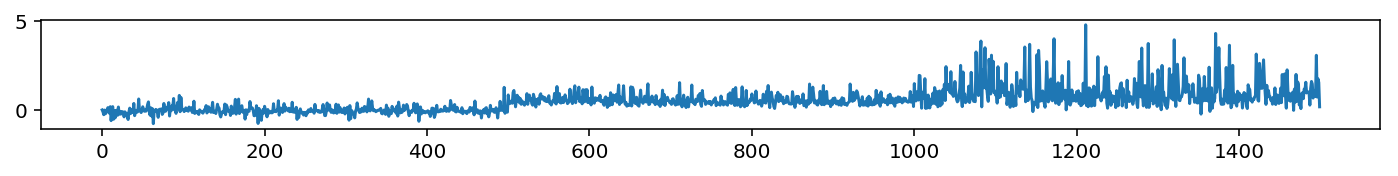

In [ ]:
with test_for_swift('Projection._feat/_agg: small example') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 1.15, 1.35)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    # spectro.S = spectro.S[:, :8]  # Not much help
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    proj = sg.search.projection._proj(AttrDict(patches=patches))
    agg = sg.search.projection._agg(AttrDict(proj=proj))
    feat = sg.search.projection._feat(AttrDict(agg=agg))
    mat_flip(proj, scale=2)
    sig(feat)
    raise Dump(proj=proj.tolist(), feat=feat.tolist())

# Projection._proj

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

160

,

857

)

array([[0.   , 0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   ],
       [0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   ],
       [0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   , 0.   ],
       [0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   , 0.   , 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   ],
       [0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   ],
       [0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   , 0.   ],
       [0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   , 0.   , 0.022],
       [0.   , 0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   ],
       [0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   , 0.005]])

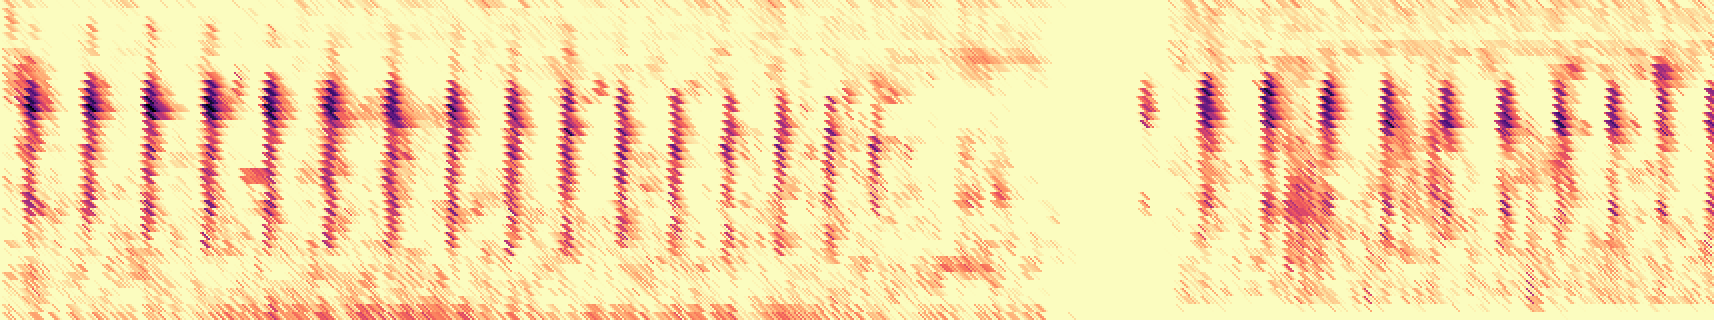

(

500

,

857

)

array([[ 0.073,  0.068,  0.231,  0.035,  0.109, -0.32 , -0.404,  0.101, -0.007],
       [-0.088,  0.102, -0.669,  0.373, -0.156, -0.041,  0.227, -0.068, -1.035],
       [-0.201, -0.382, -0.899, -1.22 , -0.601, -0.722, -0.2  ,  0.097, -0.459],
       [-0.024, -0.036, -0.278,  0.536, -0.166, -0.028, -0.185,  0.175,  0.792],
       [-0.08 , -0.126, -0.12 ,  0.217, -0.367, -0.15 , -0.149, -0.813,  0.009],
       [-0.058, -0.239, -0.14 , -0.45 ,  0.277,  0.353, -0.484, -0.417, -0.304],
       [ 0.061,  0.074,  0.226,  0.901,  0.261, -0.081, -0.069,  0.331,  0.691],
       [-0.087, -0.104, -0.331, -0.502, -0.118, -0.013, -0.278, -0.156, -0.048],
       [-0.059,  0.066,  0.605,  0.481, -0.399,  1.487, -0.573, -0.448, -0.311],
       [-0.086, -0.043, -0.067, -0.109, -0.226, -0.064,  0.056,  0.407,  0.821]])

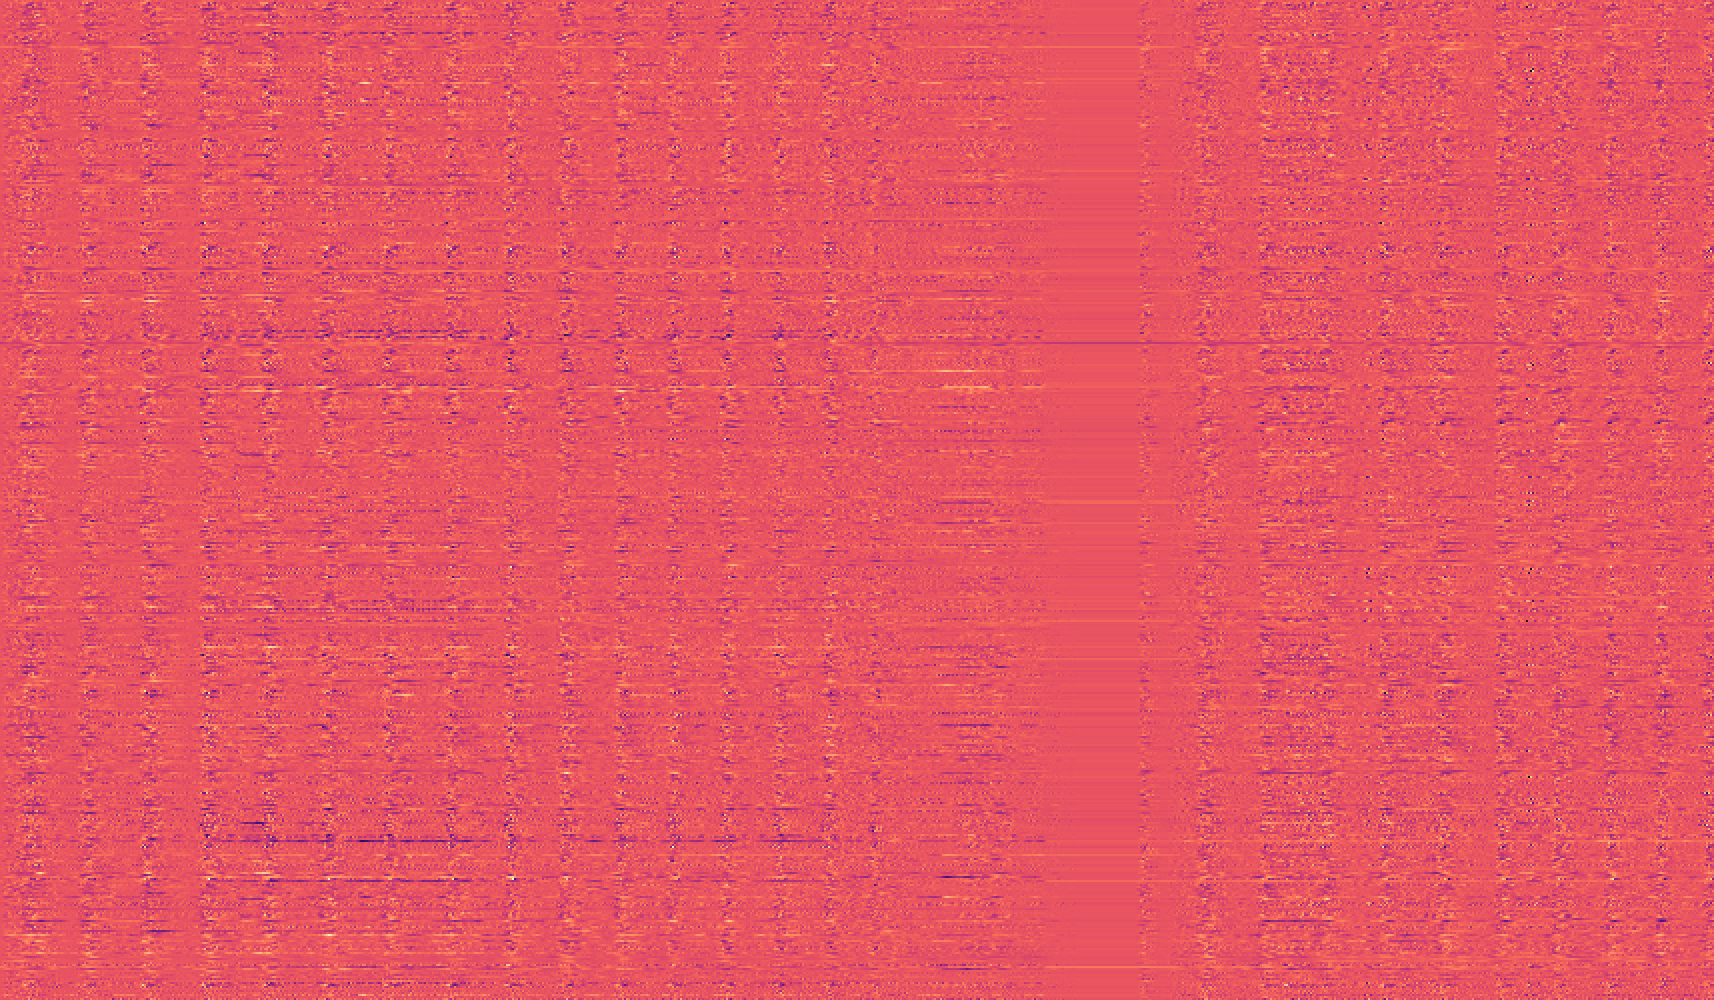

In [ ]:
with test_for_swift('Projection._proj: XC416346 start=0 end=10') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    proj = sg.search.projection._proj(AttrDict(patches=patches))
    mat_flip(patches, scale=2)
    mat_flip(proj, scale=2)
    raise Dump(patches=patches.tolist(), proj=proj.tolist())

In [ ]:
with test_for_swift('Projection._proj: small example') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 1.15, 1.35)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    spectro.S = spectro.S[:, :8]
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    proj = sg.search.projection._proj(AttrDict(patches=patches))
    mat_flip(patches, scale=2)
    mat_flip(proj, scale=2)
    raise Dump(patches=patches.tolist(), proj=proj.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

160

,

5

)

array([[0.006, 0.   , 0.066, 0.   , 0.   ],
       [0.   , 0.066, 0.   , 0.   , 0.005],
       [0.066, 0.   , 0.   , 0.005, 0.   ],
       [0.   , 0.   , 0.005, 0.   , 0.   ],
       [0.   , 0.   , 0.04 , 0.   , 0.   ],
       [0.   , 0.04 , 0.   , 0.   , 0.003],
       [0.04 , 0.   , 0.   , 0.003, 0.   ],
       [0.   , 0.   , 0.003, 0.   , 0.   ],
       [0.   , 0.014, 0.003, 0.039, 0.   ],
       [0.014, 0.003, 0.039, 0.   , 0.015]])

(

500

,

5

)

array([[-2.913e-03, -6.029e-01, -6.561e-01,  1.336e+00,  1.484e+00],
       [-3.358e-01, -5.247e-02,  4.692e-01,  9.962e-02, -2.613e-01],
       [-4.373e-01, -5.945e-01, -3.732e-01,  5.060e-01, -5.312e-01],
       [ 2.802e-01, -5.142e-02,  4.500e-01, -5.464e-01,  1.024e+00],
       [-5.085e-01,  7.782e-02,  2.346e-02, -8.413e-03, -1.059e+00],
       [ 1.185e-01,  5.530e-01,  2.535e-01, -4.594e-01, -5.215e-01],
       [-6.798e-04, -4.684e-01,  1.520e+00, -2.034e+00,  1.948e+00],
       [-5.199e-01, -1.182e+00, -2.221e+00, -9.404e-01,  1.036e+00],
       [ 4.020e-01,  5.663e-01, -1.264e+00,  1.944e-01, -1.877e-01],
       [ 9.560e-02,  2.439e-02, -1.856e-01, -2.220e-01, -2.488e-01]])

# Features._patches

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

40

,

860

)

array([[0.   , 0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.032, 0.   , 0.032, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.066, 0.064, 0.   , 0.   , 0.03 ],
       [0.   , 0.   , 0.   , 0.   , 0.053, 0.094, 0.076, 0.082, 0.093],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.074, 0.045],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.022, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.072, 0.068, 0.055, 0.035]])

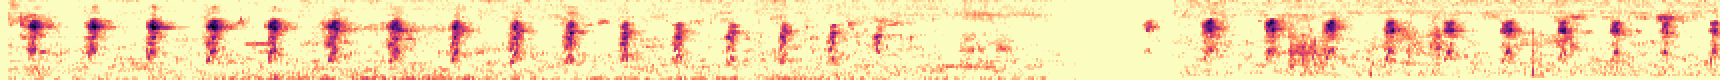

(

160

,

857

)

array([[0.   , 0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   ],
       [0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   ],
       [0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   , 0.   ],
       [0.   , 0.054, 0.09 , 0.   , 0.107, 0.   , 0.   , 0.   , 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   ],
       [0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   ],
       [0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   , 0.   ],
       [0.   , 0.061, 0.052, 0.   , 0.095, 0.   , 0.   , 0.   , 0.022],
       [0.   , 0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   ],
       [0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   , 0.005]])

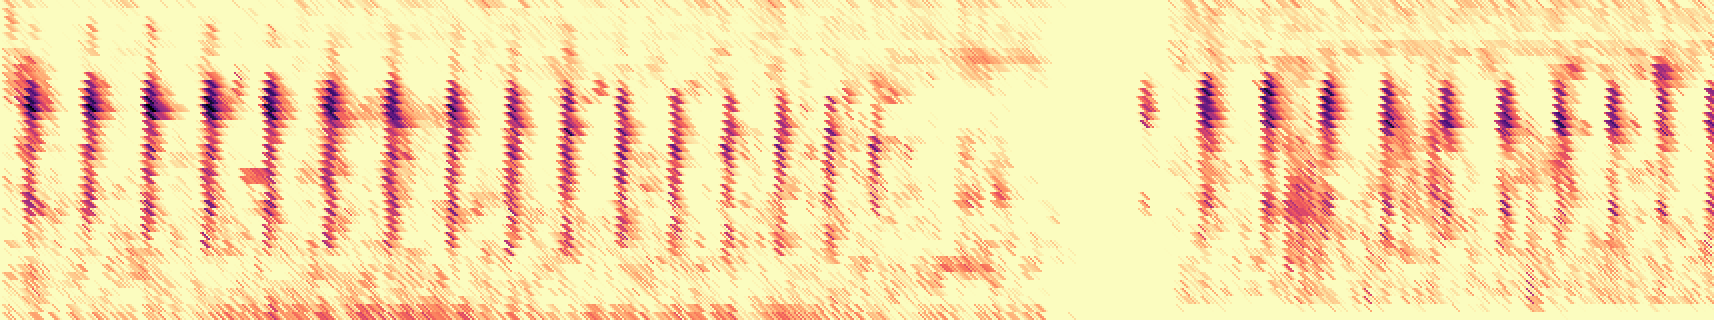

In [ ]:
with test_for_swift('Features._patches: XC416346 start=0 end=10') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    (f, t, S) = spectro
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    mat_flip(S, scale=2)
    mat_flip(patches, scale=2)
    raise Dump(f=f.tolist(), t=t.tolist(), S=S.tolist(), patches=patches.tolist())

In [ ]:
with test_for_swift('Features._patches: small example') as (name, Dump):
    (xc_id, start_s, end_s) = (416346, 1.15, 1.35)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio)
    spectro.S = spectro.S[:3, :10]
    (f, t, S) = spectro
    patches = sg.search.projection.features._patches(AttrDict(spectro=spectro))
    mat_flip(S, scale=2)
    mat_flip(patches, scale=2)
    raise Dump(f=f.tolist(), t=t.tolist(), S=S.tolist(), patches=patches.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

3

,

10

)

array([[0.006, 0.   , 0.066, 0.   , 0.   , 0.005, 0.   , 0.   , 0.069],
       [0.   , 0.   , 0.04 , 0.   , 0.   , 0.003, 0.   , 0.   , 0.065],
       [0.   , 0.014, 0.003, 0.039, 0.   , 0.015, 0.   , 0.   , 0.008]])

(

12

,

7

)

array([[0.006, 0.   , 0.066, 0.   , 0.   , 0.005, 0.   ],
       [0.   , 0.066, 0.   , 0.   , 0.005, 0.   , 0.   ],
       [0.066, 0.   , 0.   , 0.005, 0.   , 0.   , 0.069],
       [0.   , 0.   , 0.005, 0.   , 0.   , 0.069, 0.077],
       [0.   , 0.   , 0.04 , 0.   , 0.   , 0.003, 0.   ],
       [0.   , 0.04 , 0.   , 0.   , 0.003, 0.   , 0.   ],
       [0.04 , 0.   , 0.   , 0.003, 0.   , 0.   , 0.065],
       [0.   , 0.   , 0.003, 0.   , 0.   , 0.065, 0.011],
       [0.   , 0.014, 0.003, 0.039, 0.   , 0.015, 0.   ],
       [0.014, 0.003, 0.039, 0.   , 0.015, 0.   , 0.   ]])

# Features._spectro

(

(

1436

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

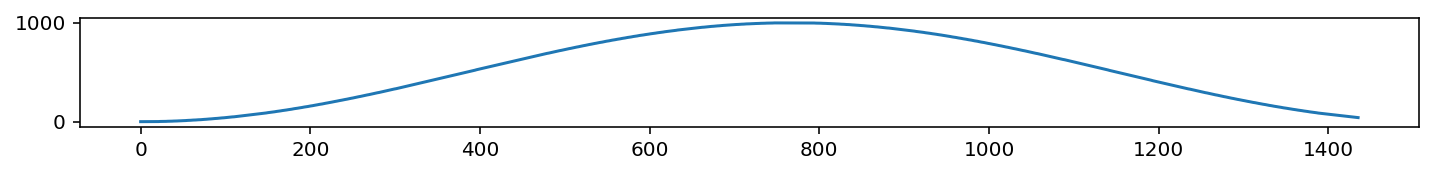

(

40

,

4

)

array([[ 67.321,  67.325,  60.453,  67.33 ],
       [ 47.391,  47.387,  42.113,  47.402],
       [ 31.045,  30.979,  18.978,  31.   ],
       [ 22.043,  22.197,   7.911,  22.204],
       [ 16.148,  15.816,   2.278,  15.853],
       [ 11.5  ,  11.586,   1.445,  11.693],
       [  8.736,   8.305,  -3.198,   8.151],
       [  4.184,   5.203,  -4.682,   5.177],
       [  5.441,   4.837, -12.67 ,   5.236],
       [  5.029,   2.725,  -3.984,   2.404]])

In [ ]:
with test_for_swift('Features._spectro: generate audio from hann window (denoise=false)') as (name, Dump):
    denoise = False
    audio = (scipy.signal.hann(512*3)[:-100] * 1000).astype(np.int16)
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, S=S.tolist())

(

(

1436

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

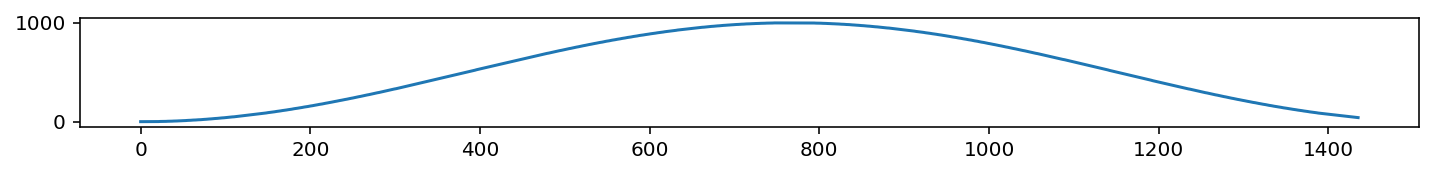

(

40

,

4

)

array([[0.000e+00, 1.213e-04, 0.000e+00, 4.387e-04],
       [1.197e-04, 0.000e+00, 0.000e+00, 8.563e-04],
       [3.705e-03, 0.000e+00, 0.000e+00, 6.857e-04],
       [0.000e+00, 5.206e-03, 0.000e+00, 5.620e-03],
       [2.110e-02, 0.000e+00, 0.000e+00, 1.222e-03],
       [0.000e+00, 2.890e-03, 0.000e+00, 1.010e-02],
       [3.416e-02, 5.195e-03, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.515e-02, 0.000e+00, 3.340e-02],
       [2.720e-02, 0.000e+00, 0.000e+00, 1.341e-02],
       [1.658e-01, 1.081e-02, 0.000e+00, 0.000e+00]])

In [ ]:
with test_for_swift('Features._spectro: generate audio from hann window (denoise=true)') as (name, Dump):
    denoise = True
    audio = (scipy.signal.hann(512*3)[:-100] * 1000).astype(np.int16)
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, S=S.tolist())  # To copy to .swift notebook

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

(

4410

,

)

,

array([ 847, 1176, 1283,  883,  617,  333,  579], dtype=int16)

)

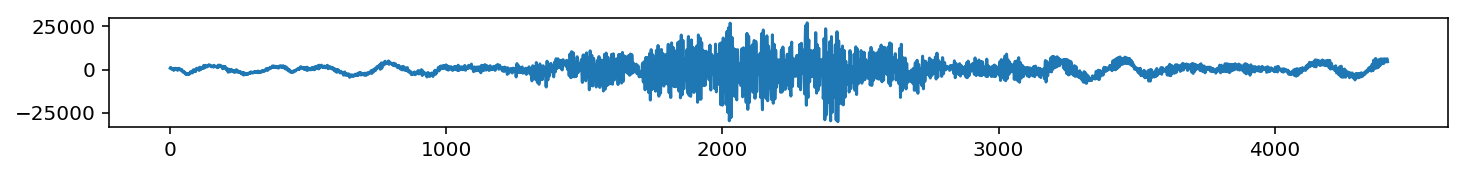

(

40

,

16

)

array([[90.157, 87.732, 94.201, 87.522, 89.386, 90.066, 87.597, 86.074, 94.361],
       [83.709, 83.55 , 88.372, 82.891, 84.358, 85.916, 85.448, 81.819, 90.077],
       [68.717, 78.749, 78.045, 80.475, 77.472, 78.823, 77.649, 77.561, 78.398],
       [72.293, 76.937, 72.932, 76.855, 70.822, 74.82 , 70.51 , 71.578, 73.959],
       [73.967, 74.351, 72.207, 72.354, 70.289, 69.079, 69.842, 69.011, 68.713],
       [67.254, 67.402, 65.741, 69.664, 66.913, 67.957, 66.219, 70.211, 64.571],
       [58.833, 58.755, 65.552, 62.459, 64.207, 60.669, 67.033, 62.937, 64.497],
       [53.793, 59.826, 67.367, 63.592, 61.212, 67.795, 66.704, 66.292, 56.401],
       [59.096, 53.031, 63.491, 61.215, 74.239, 67.697, 66.564, 70.741, 62.201],
       [56.298, 58.028, 62.448, 63.956, 79.88 , 79.825, 70.083, 69.654, 62.777]])

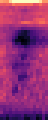

In [ ]:
with test_for_swift('Features._spectro: XC416346 start=1.15 end=1.35 (denoise=false)') as (name, Dump):
    denoise = False
    (xc_id, start_s, end_s) = (416346, 1.15, 1.35)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

(

4410

,

)

,

array([ 847, 1176, 1283,  883,  617,  333,  579], dtype=int16)

)

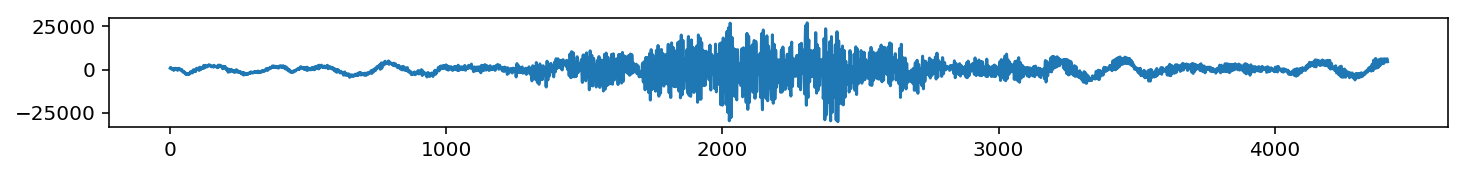

(

40

,

16

)

array([[0.006, 0.   , 0.066, 0.   , 0.   , 0.005, 0.   , 0.   , 0.069],
       [0.   , 0.   , 0.04 , 0.   , 0.   , 0.003, 0.   , 0.   , 0.065],
       [0.   , 0.014, 0.003, 0.039, 0.   , 0.015, 0.   , 0.   , 0.008],
       [0.   , 0.058, 0.   , 0.057, 0.   , 0.026, 0.   , 0.   , 0.014],
       [0.073, 0.079, 0.047, 0.049, 0.018, 0.001, 0.012, 0.   , 0.   ],
       [0.015, 0.017, 0.   , 0.051, 0.01 , 0.025, 0.   , 0.059, 0.   ],
       [0.   , 0.   , 0.021, 0.   , 0.001, 0.   , 0.043, 0.   , 0.006],
       [0.   , 0.   , 0.026, 0.   , 0.   , 0.032, 0.016, 0.01 , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.109, 0.012, 0.   , 0.057, 0.   ],
       [0.   , 0.   , 0.   , 0.003, 0.239, 0.239, 0.094, 0.088, 0.   ]])

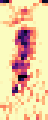

In [ ]:
with test_for_swift('Features._spectro: XC416346 start=1.15 end=1.35 (denoise=true)') as (name, Dump):
    denoise = True
    (xc_id, start_s, end_s) = (416346, 1.15, 1.35)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

(

220500

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

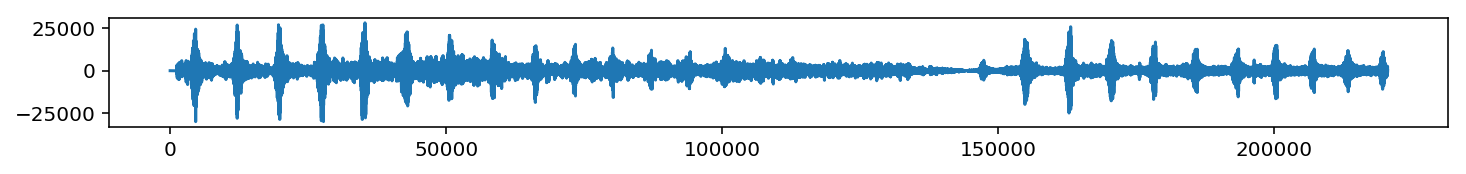

(

40

,

860

)

array([[22.594, 22.594, 22.594, 70.124, 89.619, 91.898, 84.47 , 92.969, 82.75 ],
       [22.594, 22.594, 22.594, 60.312, 87.14 , 86.54 , 80.515, 89.28 , 79.27 ],
       [22.594, 22.594, 22.594, 56.565, 77.063, 76.559, 72.111, 77.395, 72.006],
       [22.594, 22.594, 22.594, 52.305, 70.794, 73.533, 69.285, 73.569, 66.696],
       [22.594, 22.594, 22.594, 49.43 , 74.128, 73.996, 69.079, 67.379, 71.8  ],
       [22.594, 22.594, 22.594, 48.955, 72.301, 74.89 , 73.787, 74.179, 74.882],
       [22.594, 22.594, 22.594, 48.383, 64.143, 66.468, 66.733, 71.539, 69.724],
       [22.594, 22.594, 22.594, 47.115, 57.296, 61.405, 61.271, 63.485, 61.315],
       [22.594, 22.594, 22.594, 47.819, 58.417, 64.494, 62.558, 59.759, 59.28 ],
       [22.594, 22.594, 22.594, 47.058, 61.803, 66.872, 66.603, 65.818, 64.488]])

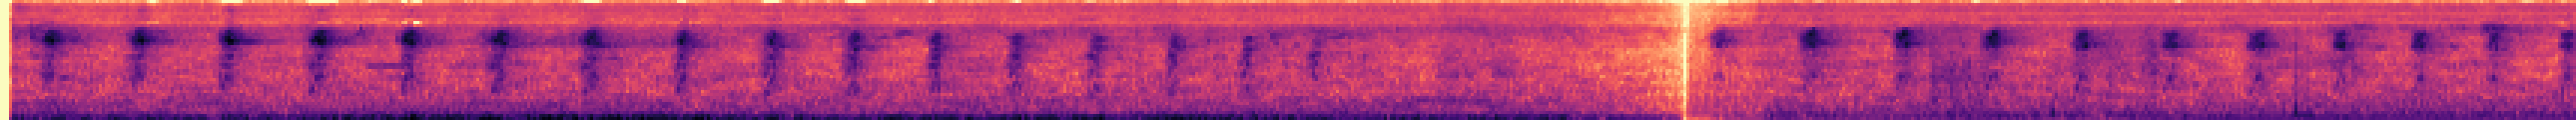

In [ ]:
with test_for_swift('Features._spectro: XC416346 start=0 end=10 (denoise=false)') as (name, Dump):
    denoise = False
    (xc_id, start_s, end_s) = (416346, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

(

(

220500

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

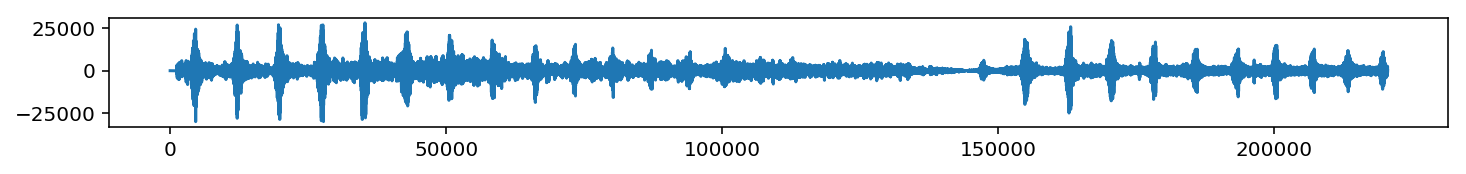

(

40

,

860

)

array([[0.   , 0.   , 0.   , 0.   , 0.054, 0.09 , 0.   , 0.107, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.061, 0.052, 0.   , 0.095, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.011, 0.003, 0.   , 0.016, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.032, 0.   , 0.032, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.066, 0.064, 0.   , 0.   , 0.03 ],
       [0.   , 0.   , 0.   , 0.   , 0.053, 0.094, 0.076, 0.082, 0.093],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.074, 0.045],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.022, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.072, 0.068, 0.055, 0.035]])

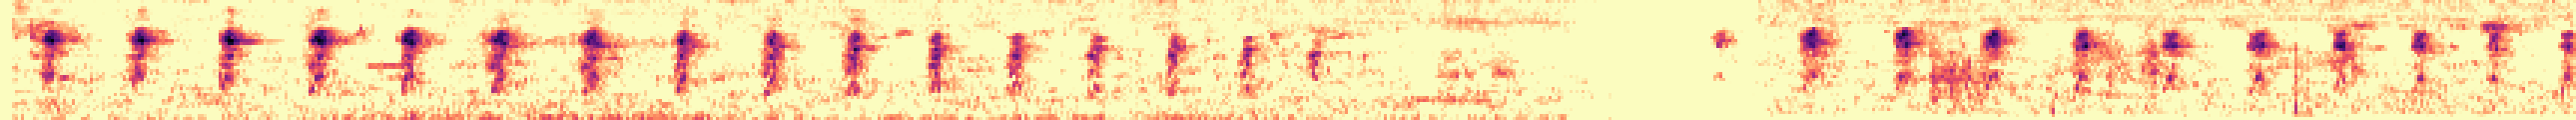

In [ ]:
with test_for_swift('Features._spectro: XC416346 start=0 end=10 (denoise=true)') as (name, Dump):
    denoise = True
    (xc_id, start_s, end_s) = (416346, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat_flip(S, scale=3)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

# Features._spectro_denoise

(

4

,

5

)

array([[0.824, 0.561, 0.707, 0.851, 0.824],
       [0.079, 0.382, 0.672, 0.022, 0.749],
       [0.202, 0.068, 0.324, 0.762, 0.267],
       [0.15 , 0.034, 0.533, 0.93 , 0.23 ]])

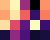

(

4

,

5

)

array([[0.000e+00, 0.000e+00, 0.000e+00, 4.783e-02, 5.586e-04],
       [0.000e+00, 0.000e+00, 5.258e-01, 0.000e+00, 6.651e-01],
       [0.000e+00, 0.000e+00, 1.023e-01, 8.962e-01, 0.000e+00],
       [0.000e+00, 0.000e+00, 5.494e-01, 1.269e+00, 0.000e+00]])

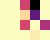

In [ ]:
with test_for_swift('Features._spectro_denoise') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = Features._spectro_denoise(None, spectro).S
    mat_flip(X, scale=10)
    mat_flip(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())